In [2]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

In [3]:
features = pd.read_csv('radiomic_features_CT.csv')
features.head()

,Patient_ID,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,...,wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,289011,v3.0.1,1.21.2,2.1.1,1.2.0,3.7.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [2, 3, 4, 5]...",89d90290554602b975ada43505a69c1bc8c826c4,3D,...,821.129318,0.000743,6.568786,0.044218,382528.904043,1.683386,0.000100,3663.632754,0.001113,3.228223
1,280134,v3.0.1,1.21.2,2.1.1,1.2.0,3.7.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [2, 3, 4, 5]...",ce1cda0623e71c26cfe82be0a6b4af74ecdda085,3D,...,200.180319,0.008005,6.757387,0.046546,300751.162423,5.076678,0.000104,6463.019084,0.001768,6.017234
2,280095,v3.0.1,1.21.2,2.1.1,1.2.0,3.7.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [2, 3, 4, 5]...",bd380952d3f82db9e7abf5912335b74dbddd6a28,3D,...,1004.048093,0.007573,6.487518,0.086426,8097.538907,0.381888,0.001768,5264.534361,0.018808,160.999256
3,289005,v3.0.1,1.21.2,2.1.1,1.2.0,3.7.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [2, 3, 4, 5]...",4e076144ad4548a23e7250f96a2dd311a4eaf38b,3D,...,371.495984,0.003744,6.817340,0.052093,299074.465997,3.399152,0.000105,5902.443332,0.001887,5.764519
4,289045,v3.0.1,1.21.2,2.1.1,1.2.0,3.7.11,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [2, 3, 4, 5]...",e2b0af059d638806d58dc59cf9241772ee8616d2,3D,...,12603.062633,0.000129,7.931227,0.123330,131427.240951,0.229857,0.000079,46911.391740,0.006198,12.363374


In [4]:
substring = 'diagnostics'
for col in features.columns:
    if substring in col:
        features = features.drop([col],axis=1)
        
features

,Patient_ID,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,289011,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,821.129318,0.000743,6.568786,0.044218,382528.904043,1.683386,0.000100,3663.632754,0.001113,3.228223
1,280134,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,200.180319,0.008005,6.757387,0.046546,300751.162423,5.076678,0.000104,6463.019084,0.001768,6.017234
2,280095,0.225255,0.029144,7.036833,241.447762,473.472014,469.667478,87.033144,475.004126,19875.593402,...,1004.048093,0.007573,6.487518,0.086426,8097.538907,0.381888,0.001768,5264.534361,0.018808,160.999256
3,289005,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,371.495984,0.003744,6.817340,0.052093,299074.465997,3.399152,0.000105,5902.443332,0.001887,5.764519
4,289045,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,12603.062633,0.000129,7.931227,0.123330,131427.240951,0.229857,0.000079,46911.391740,0.006198,12.363374
5,280120,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,73.203779,0.009108,6.170120,0.039978,372015.890566,10.711112,0.000107,1146.876189,0.002390,0.763044
6,280025,0.225255,0.029144,7.036833,241.447762,473.472014,469.667478,87.033144,475.004126,19875.593402,...,124.006068,0.013182,5.717054,0.072077,18625.812535,1.010916,0.001547,714.671555,0.003791,11.998240
7,280019,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,125.750335,0.009606,6.256882,0.034917,692338.663879,9.183308,0.000089,2556.899201,0.000903,4.531687
8,280043,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,2267.078789,0.001022,7.735042,0.066423,212240.905067,1.967385,0.000096,12261.777001,0.024050,5.493050
9,289001,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,106.784846,0.005418,6.050286,0.038966,470318.051919,8.199531,0.000102,1222.922918,0.001654,1.137072


In [5]:
features.head()

,Patient_ID,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,289011,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,821.129318,0.000743,6.568786,0.044218,382528.904043,1.683386,0.000100,3663.632754,0.001113,3.228223
1,280134,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,200.180319,0.008005,6.757387,0.046546,300751.162423,5.076678,0.000104,6463.019084,0.001768,6.017234
2,280095,0.225255,0.029144,7.036833,241.447762,473.472014,469.667478,87.033144,475.004126,19875.593402,...,1004.048093,0.007573,6.487518,0.086426,8097.538907,0.381888,0.001768,5264.534361,0.018808,160.999256
3,289005,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,371.495984,0.003744,6.817340,0.052093,299074.465997,3.399152,0.000105,5902.443332,0.001887,5.764519
4,289045,0.255342,0.021682,11.673847,538.400554,1249.912401,1249.974403,183.629793,1250.037055,423888.588475,...,12603.062633,0.000129,7.931227,0.123330,131427.240951,0.229857,0.000079,46911.391740,0.006198,12.363374


In [6]:
mTICI = pd.read_csv('mTICI_labels.csv')
mTICI.head()
features = pd.concat([mTICI, features], axis=1)
features.to_csv('features_w_mTICI.csv',index=False)
#features.head()

In [7]:
mTICI.head()

,Label_mTICI_2c+
0,1
1,0
2,0
3,0
4,0


In [8]:
features = pd.read_csv('features_w_mTICI.csv')
radiomics = features.loc[:,features.columns != 'Label_mTICI_2c+'].columns

X= np.array(features[radiomics])
y= np.array(features['Label_mTICI_2c+'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20 ,random_state= 4)


In [9]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('selector', SelectKBest(mutual_info_classif, k=5)),
                 ('classifier', LogisticRegression(solver = 'lbfgs'))])

In [10]:
search_space = [{'selector__k': [5, 10, 20, 30]},
                {'classifier__C': [0.01, 0.1, 1.0]}]

In [11]:
clf = GridSearchCV(pipe, search_space, cv=5, verbose=1)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
#A ‘roc_auc_score’ of 0.5 means the model is unable to distinguish between classes. 

print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

roc_auc_score:  0.5
f1 score:  0.0


In [13]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_classif at 0x7f9b70531c10>)),
                ('classifier', LogisticRegression(C=0.01))])

In [14]:
clf.best_score_

0.63

In [15]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('selector', SelectKBest(mutual_info_classif, k=5)),
                 ('classifier', RandomForestClassifier(n_estimators=100))])

In [16]:
search_space = [{'selector__k': [5, 10, 20, 30]},
                {'classifier__max_depth': [5, 10, None]}
                ]

In [17]:
clf2 = GridSearchCV(pipe, search_space, cv=5, verbose=1)
clf2 = clf.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
#A ‘roc_auc_score’ of 0.5 means the model is unable to distinguish between classes. 

print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

roc_auc_score:  0.5
f1 score:  0.0


In [19]:
clf2.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_classif at 0x7f9b70531c10>)),
                ('classifier', LogisticRegression(C=0.01))])

In [20]:
clf2.best_score_

0.63

In [21]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('selector', SelectKBest(mutual_info_classif, k=5)),
                 ('classifier', KNeighborsClassifier())])

In [22]:
search_space = [{'selector__k': [5, 10, 20, 30]},
                {
                 'classifier__n_neighbors': [3, 7, 11],
                 'classifier__weights': ['uniform', 'distance']}]

In [23]:
clf3 = GridSearchCV(pipe, search_space, cv=5, verbose=1)
clf3 = clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
#A ‘roc_auc_score’ of 0.5 means the model is unable to distinguish between classes. 

print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

roc_auc_score:  0.75
f1 score:  0.6666666666666666


In [25]:
clf3.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x7f9b70531c10>)),
                ('classifier', KNeighborsClassifier())])

In [26]:
clf3.best_score_

0.57

Cumulative explained variation for 2 principal components: 0.971954610384043.
Cumulative explained variation for 22 principal components: 0.9999999999808735.


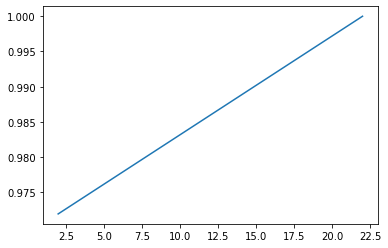

In [27]:
# feature reduction PCA
from sklearn.decomposition import PCA

n_components_list = range(2, 40, 20)
result = []
for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(X_train)
    result.append(np.sum(pca.explained_variance_ratio_))
    print(f'Cumulative explained variation for {n_components} principal components: {np.sum(pca.explained_variance_ratio_)}.')
    
plt.plot(n_components_list, result)
    

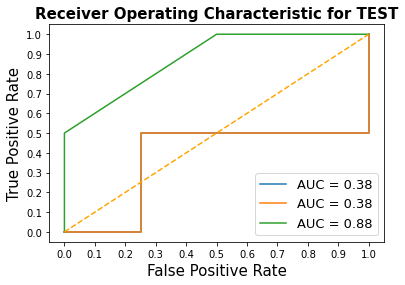

In [29]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

list = [clf, clf2, clf3]

for e in list: 
    # calculate the fpr and tpr for all thresholds of the classification
    probs = e.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr,  label = 'AUC = %0.2f' % roc_auc)


# method I: plt

plt.title('Receiver Operating Characteristic for TEST',fontweight='bold', fontsize=15)

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)


plt.legend(prop={'size':13}, loc='lower right')

plt.show()


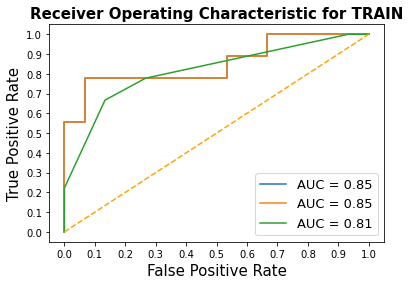

In [35]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

list = [clf, clf2, clf3]

for e in list: 
    # calculate the fpr and tpr for all thresholds of the classification
    probs = e.predict_proba(X_train)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr,  label = 'AUC = %0.2f' % roc_auc)


# method I: plt

plt.title('Receiver Operating Characteristic for TRAIN',fontweight='bold', fontsize=15)

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)


plt.legend(prop={'size':13}, loc='lower right')

plt.show()
